In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [380]:
# Load the data.
dataset = pd.read_csv('merged_data.csv')
dataset

,Unnamed: 0,Brand,Model,mass,wheel_base,axle_width_steering,axle_width_other,engine_cap,engine_pow,co2_wltp,CO2
0,0,Alfa Romeo,Giulia,1620.0,2820.0,1556.0,1629.0,1995.0,206.0,184.0,182.051282
1,1,Alfa Romeo,Giulia,1640.0,2820.0,1556.0,1629.0,2143.0,154.0,145.0,182.051282
2,2,Alfa Romeo,Giulia,1570.0,2820.0,1571.0,1641.0,2143.0,140.0,133.0,182.051282
3,3,Alfa Romeo,Giulia,1640.0,2820.0,1556.0,1629.0,2143.0,154.0,141.0,182.051282
4,4,Alfa Romeo,Giulia,1570.0,2820.0,1571.0,1641.0,2143.0,140.0,128.0,182.051282
...,...,...,...,...,...,...,...,...,...,...,...
214853,11805865,Volvo,Xc90,2210.0,2984.0,1674.0,1674.0,1969.0,173.0,184.0,249.122807
214854,11805868,Volvo,Xc90,2181.0,2984.0,1674.0,1674.0,1969.0,173.0,171.0,249.122807
214855,11805875,Volvo,Xc90,2211.0,2984.0,1674.0,1674.0,1969.0,173.0,185.0,249.122807
214856,11805882,Volvo,Xc90,2206.0,2984.0,1666.0,1666.0,1969.0,173.0,199.0,249.122807


In [381]:
# We need to see the data types of columns to see if do we need to convert their types.
print (dataset.dtypes)
# "Brand" and "Model" will not be used for training the model. So, we need to drop these columns.

Unnamed: 0               int64
Brand                   object
Model                   object
mass                   float64
wheel_base             float64
axle_width_steering    float64
axle_width_other       float64
engine_cap             float64
engine_pow             float64
co2_wltp               float64
CO2                    float64
dtype: object


In [382]:
dataset.drop(columns=["Brand","Model","Unnamed: 0"],inplace= True)
print (dataset.dtypes)
# All columns have numeric values.

mass                   float64
wheel_base             float64
axle_width_steering    float64
axle_width_other       float64
engine_cap             float64
engine_pow             float64
co2_wltp               float64
CO2                    float64
dtype: object


In [383]:
dataset.isnull().sum()
# There is no missing values, so we do not need to do filling.

mass                   0
wheel_base             0
axle_width_steering    0
axle_width_other       0
engine_cap             0
engine_pow             0
co2_wltp               0
CO2                    0
dtype: int64

In [384]:
# There may be some columns that has same value for every row.
columns_to_remove = []
for column in dataset.columns:
    if dataset[column].nunique() == 1:
        columns_to_remove.append(column)

print(columns_to_remove)
# There is no such case in this dataset. So, we did not remove any column.

[]


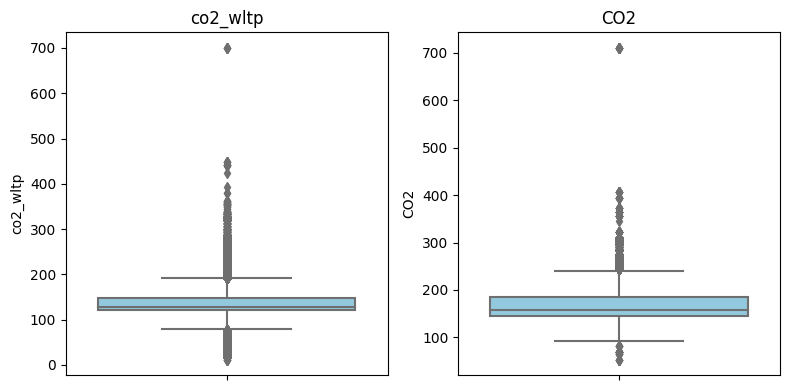

In [385]:
# Lets see the boxplot graphs of "co2_wltp" and "CO2" to visualize outliers.
# We did not considered other features, because they are about vehicle specific.
plt.figure(figsize=(8, 4))
i = 1
for column in ["co2_wltp","CO2"]:
    plt.subplot(1, 2,i)  
    i+=1
    sns.boxplot(data=dataset, y=column, color='skyblue')
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# As we cann see, there are outliers value for higher than 500, so we need to drop them.

In [386]:
print("Before outlier detection shape of data is :",dataset.shape)
dataset = dataset[dataset['CO2'] <= 500]
dataset = dataset[dataset['co2_wltp'] <= 500]
print("After outlier detection shape of data is :",dataset.shape)
# 15 samples removed due to outlier detection.

Before outlier detection shape of data is : (214858, 8)
After outlier detection shape of data is : (214843, 8)


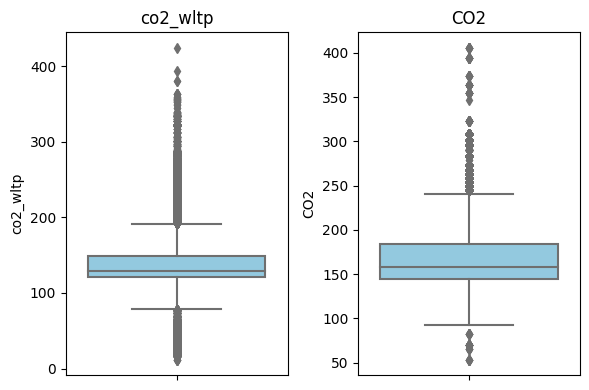

In [387]:
plt.figure(figsize=(6, 4))
i = 1
for column in ["co2_wltp","CO2"]:
    plt.subplot(1, 2,i)  
    i+=1
    sns.boxplot(data=dataset, y=column, color='skyblue')
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# As we cann see, outliers are gone.

In [388]:
# Lets see the statistical values of all features after outlier extraction.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
mass,214843.0,1520.026052,293.916037,750.000000,1352.000000,1451.000000,1618.000000,4427.000000
wheel_base,214843.0,2720.789311,199.746500,600.000000,2640.000000,2690.000000,2785.000000,4490.000000
axle_width_steering,214843.0,1568.129695,93.481304,530.000000,1535.000000,1566.000000,1581.000000,3000.000000
axle_width_other,214843.0,1564.794650,95.805024,650.000000,1530.000000,1566.000000,1578.000000,3000.000000
engine_cap,214843.0,1540.840823,492.883539,658.000000,999.000000,1498.000000,1968.000000,6749.000000
engine_pow,214843.0,109.145083,38.720124,10.000000,88.000000,103.000000,114.000000,485.000000
co2_wltp,214843.0,137.318270,35.784233,12.000000,121.000000,129.000000,149.000000,424.000000
CO2,214843.0,168.716994,39.221586,53.383459,144.897959,157.777778,184.415584,405.714286


In [389]:
# "CO2" column will be predicted, so we did not scaled it.
features_to_scale = dataset.drop('CO2', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)
dataset_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
dataset_scaled['CO2'] = dataset['CO2']
dataset = dataset_scaled
dataset

,mass,wheel_base,axle_width_steering,axle_width_other,engine_cap,engine_pow,co2_wltp,CO2
0,0.340145,0.496684,-0.129756,0.670168,0.921435,2.501416,1.304537,182.051282
1,0.408192,0.496684,-0.129756,0.670168,1.221710,1.158442,0.214669,182.051282
2,0.170028,0.496684,0.030705,0.795423,1.221710,0.796872,-0.120675,182.051282
3,0.408192,0.496684,-0.129756,0.670168,1.221710,1.158442,0.102887,182.051282
4,0.170028,0.496684,0.030705,0.795423,1.221710,0.796872,-0.260402,182.051282
...,...,...,...,...,...,...,...,...
214838,2.347526,1.317727,1.132532,1.139873,0.868684,1.649144,1.304537,249.122807
214839,2.248858,1.317727,1.132532,1.139873,0.868684,1.649144,0.941247,249.122807
214840,2.350928,1.317727,1.132532,1.139873,0.868684,1.649144,1.332482,249.122807
214841,2.333917,1.317727,1.046953,1.056370,0.868684,1.649144,1.723717,249.122807


In [390]:
dataset.dropna(inplace=True)
dataset.isnull().sum()
# We made sure, data do not contain missing value.

mass                   0
wheel_base             0
axle_width_steering    0
axle_width_other       0
engine_cap             0
engine_pow             0
co2_wltp               0
CO2                    0
dtype: int64

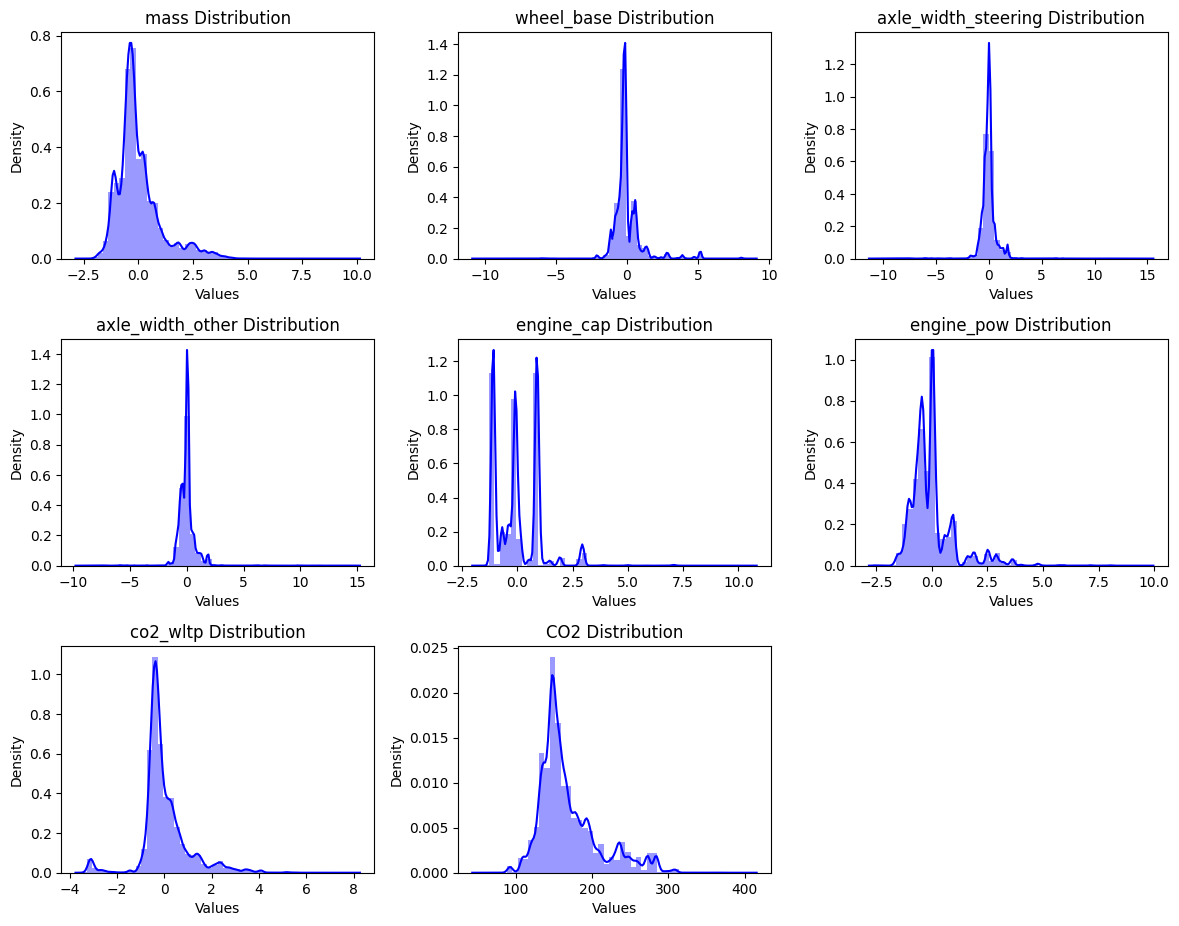

In [391]:
# Distribution of all features.
plt.figure(figsize=(12, 12))  
n_features = len(dataset.columns)
n_rows = (n_features // 3) + (n_features % 3)  
for i, column in enumerate(dataset.columns):
    plt.subplot(n_rows, 3, i + 1) 
    sns.distplot(dataset[column], color='b')
    plt.title(f'{column} Distribution')
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

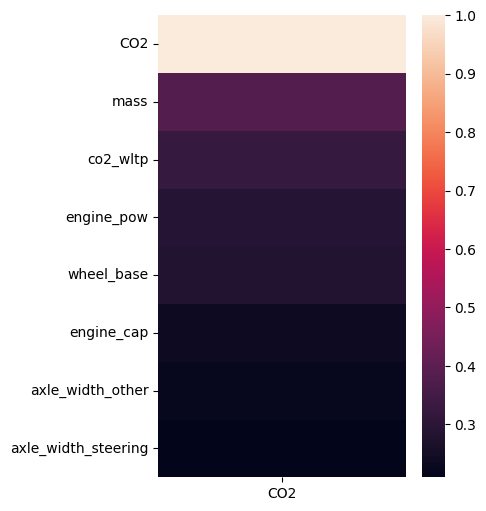

In [392]:
# Correlation graph for the target column.
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(dataset.corr()[["CO2"]].sort_values(by="CO2",ascending=False))

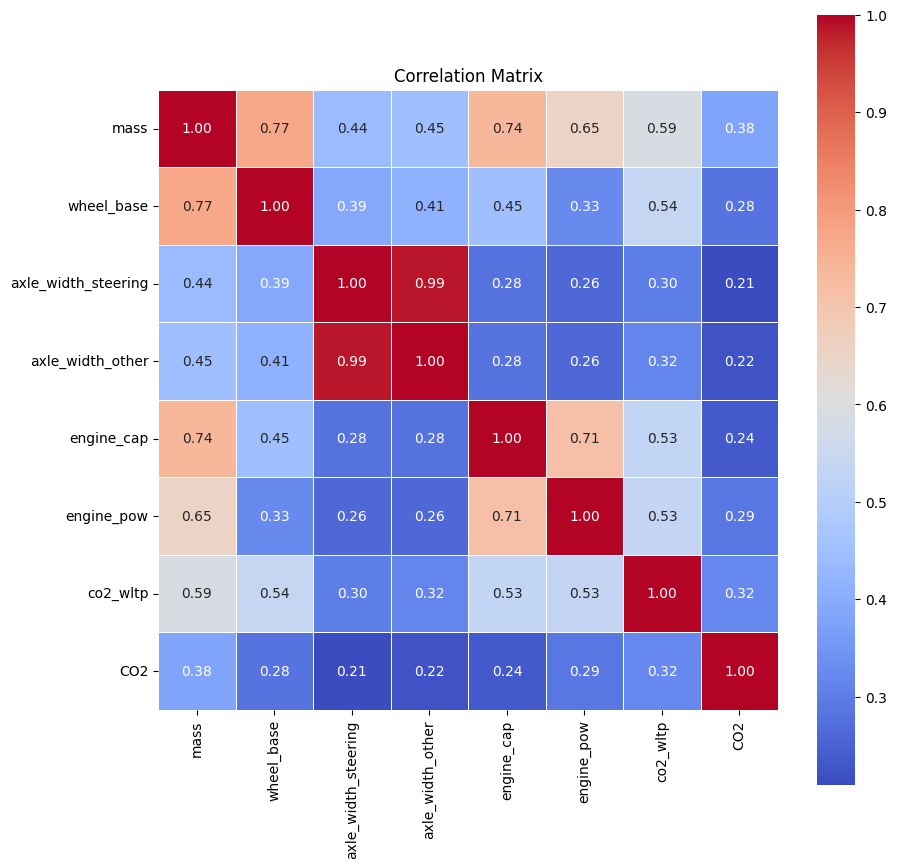

In [393]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True,square=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


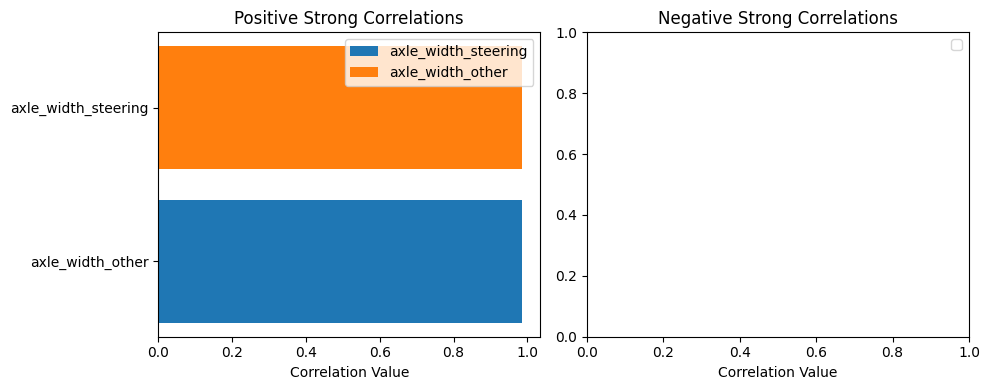

In [394]:
# We set a threshold to decide strong correlations.
positive_strong_threshold = 0.80
negative_strong_threshold = -0.80

positive_strong_correlations_dict = {}
negative_strong_correlations_dict = {}

for column in correlation_matrix.columns:
    strong_corr = correlation_matrix[(correlation_matrix[column] > positive_strong_threshold) & (correlation_matrix[column] < 1)][column]
    if not strong_corr.empty and column != strong_corr.index[0]:  
        positive_strong_correlations_dict[column] = strong_corr.to_dict()

for column in correlation_matrix.columns:
    strong_corr = correlation_matrix[(correlation_matrix[column] < negative_strong_threshold) & (correlation_matrix[column] > -1)][column]
    if not strong_corr.empty and column != strong_corr.index[0]: 
        negative_strong_correlations_dict[column] = strong_corr.to_dict()

# Plot a graph that shows which feature is strongly correlated with which one.
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
for variable, correlations in positive_strong_correlations_dict.items():
    plt.barh(list(correlations.keys()), list(correlations.values()), label=variable)
plt.xlabel('Correlation Value')
plt.title('Positive Strong Correlations')
plt.legend()

plt.subplot(1, 2, 2)
for variable, correlations in negative_strong_correlations_dict.items():
    plt.barh(list(correlations.keys()), list(correlations.values()), label=variable)
plt.xlabel('Correlation Value')
plt.title('Negative Strong Correlations')
plt.legend()

plt.tight_layout()
plt.show()

"axle_width_steering" and "axle_width_other" columns are highly correlated. We need one of them.

In [395]:
# We will keep the only one feature of strong correlations.
features_to_dropped = set()

# Positively correlated features
for feature, corr_dict in positive_strong_correlations_dict.items():
    if feature not in features_to_dropped:
        # Mark correlated features as non-selectable
        for correlated_feature in corr_dict.keys():
            features_to_dropped.add(correlated_feature)

# Negatively correlated features
for feature, corr_dict in negative_strong_correlations_dict.items():
    if feature not in features_to_dropped:
        # Mark correlated features as non-selectable
        for correlated_feature in corr_dict.keys():
            features_to_dropped.add(correlated_feature)

# Remove non-selectable columns from the dataset
feature_selected_data = dataset.drop(columns=features_to_dropped)
dataset = feature_selected_data
dataset
# After feature selection, we reduced the feature size from 8 to 7.

,mass,wheel_base,axle_width_steering,engine_cap,engine_pow,co2_wltp,CO2
0,0.340145,0.496684,-0.129756,0.921435,2.501416,1.304537,182.051282
1,0.408192,0.496684,-0.129756,1.221710,1.158442,0.214669,182.051282
2,0.170028,0.496684,0.030705,1.221710,0.796872,-0.120675,182.051282
3,0.408192,0.496684,-0.129756,1.221710,1.158442,0.102887,182.051282
4,0.170028,0.496684,0.030705,1.221710,0.796872,-0.260402,182.051282
...,...,...,...,...,...,...,...
214838,2.347526,1.317727,1.132532,0.868684,1.649144,1.304537,249.122807
214839,2.248858,1.317727,1.132532,0.868684,1.649144,0.941247,249.122807
214840,2.350928,1.317727,1.132532,0.868684,1.649144,1.332482,249.122807
214841,2.333917,1.317727,1.046953,0.868684,1.649144,1.723717,249.122807


In [396]:
X = dataset.drop('CO2',axis=1)
y = dataset['CO2'] # target value
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [397]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)

print("intercept: ", model.intercept_)
print("coef: ", model.coef_)

intercept:  168.69813459607735
coef:  [17.03526571 -3.84112287  1.52549922 -7.67792665  2.76990674  6.85807687]


In [398]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [399]:
# 0.17 (R²) indicates an average model.
r2 = metrics.r2_score(y_test, predictions)
print(f'R-squared (R²): {r2}')
# (MAE)
mae = metrics.mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')
# (MSE)
mse = metrics.mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
# (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
mape = mean_absolute_percentage_error(y_test, predictions)
print(f'MAPE: {mape}%')
# Lower MAPE value indicates a better model.

R-squared (R²): 0.1779705811205955
Mean Absolute Error (MAE): 25.324845963501883
Mean Squared Error (MSE): 1264.999902504842
Root Mean Squared Error (RMSE): 35.56683711696673
MAPE: 14.607158314998077%


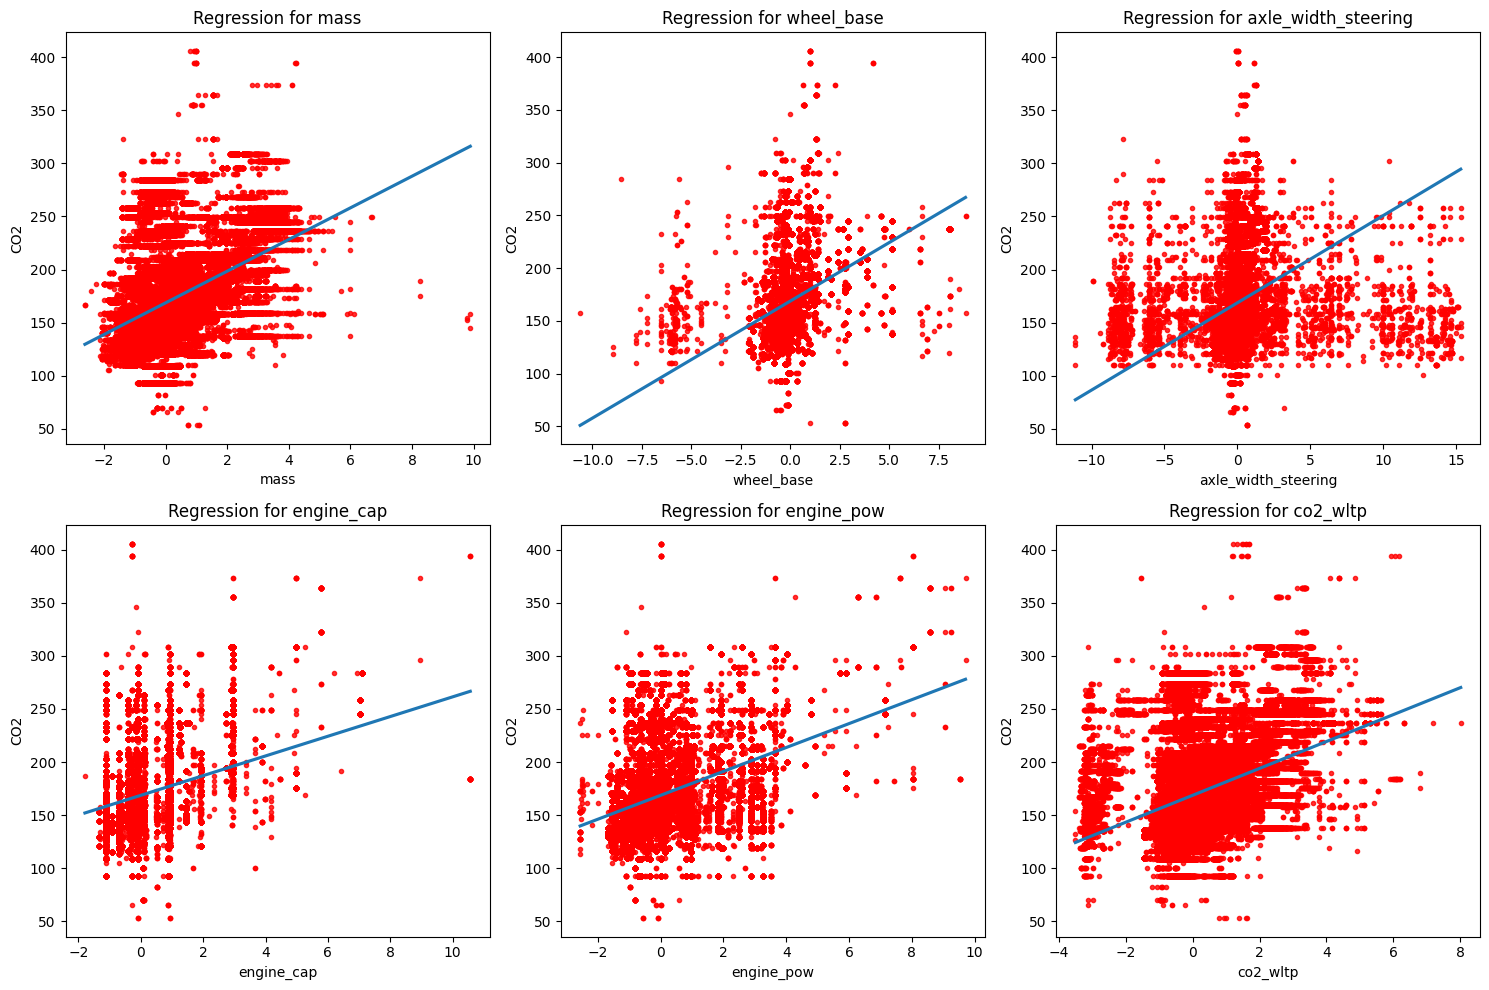

In [400]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Regression lines for all training features.
columns_to_plot = dataset.columns[:-1]  
for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 3)
    g = sns.regplot(x=dataset[column], y=dataset['CO2'], ci=None, scatter_kws={'color': 'r', 's': 9}, ax=axes[row, col])
    g.set_title(f"Regression for {column}")
    g.set_ylabel("CO2")
    g.set_xlabel(column)

for i in range(len(columns_to_plot), 2 * 3):
    row, col = divmod(i, 3)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

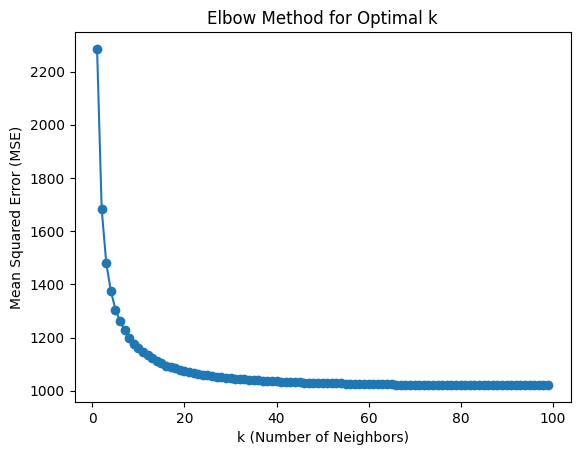

In [401]:
# Elbow Method to decide best k.
k_values = range(1, 100)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

k = 10 is the best value for the model.

In [402]:
knn_model = KNeighborsRegressor(n_neighbors=10) 
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [403]:
# 0.17 (R²) indicates an average model.
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')
# (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
# (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
# (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}%')
# Lower MAPE value indicates a better model.

R-squared (R²): 0.24521886140106208
Mean Absolute Error (MAE): 24.123450285708472
Mean Squared Error (MSE): 1161.5132558658747
Root Mean Squared Error (RMSE): 34.0809808524619
MAPE: 13.973681319991845%


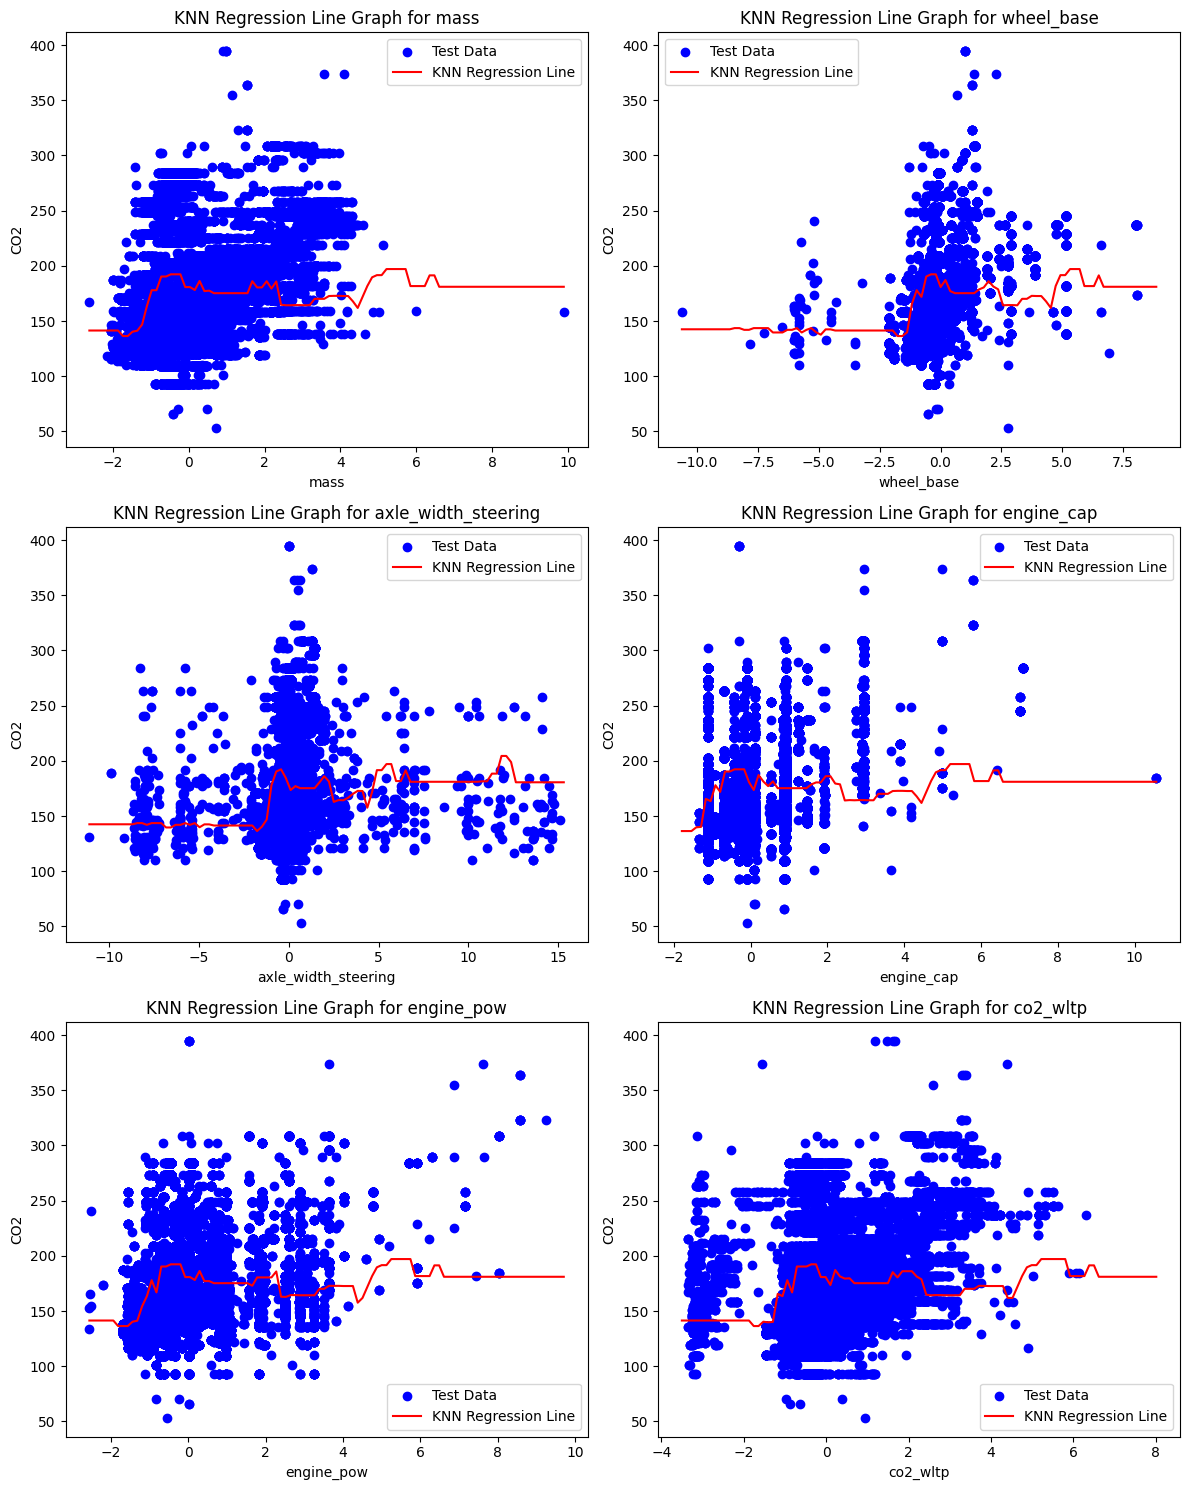

In [412]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# KNN Regression lines for all training features.
columns_to_plot = dataset.columns[:-1]
for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 2)
    
    knn_model = KNeighborsRegressor(n_neighbors=10)  
    knn_model.fit(X, y)
    
    feature_range = np.linspace(min(dataset[column]), max(dataset[column]), 100)

    X_range = np.column_stack((feature_range, np.full_like(feature_range, dataset['wheel_base'].mean()),
                               np.full_like(feature_range, dataset['axle_width_steering'].mean()),
                               np.full_like(feature_range, dataset['engine_cap'].mean()),
                               np.full_like(feature_range, dataset['engine_pow'].mean()),
                               np.full_like(feature_range, dataset['co2_wltp'].mean())
                               ))
    y_pred_range = knn_model.predict(X_range)
    
    axes[row, col].scatter(X_test[column], y_test, color='blue', label='Test Data')
    axes[row, col].plot(feature_range, y_pred_range, color='red', label='KNN Regression Line')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('CO2')
    axes[row, col].set_title(f'KNN Regression Line Graph for {column}')
    axes[row, col].legend()

for i in range(len(columns_to_plot), 3 * 2):
    row, col = divmod(i, 2)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()